In [ ]:
# import pandas as pd
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score

# # Load the dataset
# dataset = pd.read_csv('Mumbai1.csv')

# # Split the dataset into features and target
# X = df2[['Area', 'Bedroom', 'Location', 'Lift', 'Security', 'Maintenance']]
# y = df['Price']

# # Convert categorical features into numerical values
# X = pd.get_dummies(X)

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # Create the decision tree regression model
# regressor = DecisionTreeRegressor(random_state=0)

# # Train the model using the training data
# regressor.fit(X_train, y_train)

# # Predict the prices of the test data
# y_pred = regressor.predict(X_test)

# # Evaluate the model using the R-squared score
# score = r2_score(y_test, y_pred)
# print('R-squared score:', score)


In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
dataset = pd.read_csv('Mumbai1.csv')

In [3]:
df1 = dataset.drop(['No. of Bedrooms','Gymnasium',"Children's Play Area",'Clubhouse','Landscaped Gardens','Jogging Track','Swimming Pool','Indoor Games','New/Resale','Gas Connection'],axis='columns')
df1.head()

,Unnamed: 0,Price,Area,Location,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Intercom
0,0,4850000,720,Kharghar,1,1,1,1,0
1,1,4500000,600,Kharghar,1,1,1,1,0
2,2,6700000,650,Kharghar,1,1,1,1,1
3,3,4500000,650,Kharghar,1,1,1,1,1
4,4,5000000,665,Kharghar,1,1,1,1,1


In [4]:
df1.drop(columns=df1.columns[0], 
        axis=1, 
        inplace=True)

In [5]:
df1.head()

,Price,Area,Location,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Intercom
0,4850000,720,Kharghar,1,1,1,1,0
1,4500000,600,Kharghar,1,1,1,1,0
2,6700000,650,Kharghar,1,1,1,1,1
3,4500000,650,Kharghar,1,1,1,1,1
4,5000000,665,Kharghar,1,1,1,1,1


In [6]:
df1.isnull().sum()

Price                0
Area                 0
Location             0
Lift Available       0
Car Parking          0
Maintenance Staff    0
24x7 Security        0
Intercom             0
dtype: int64

In [7]:
df2 = df1.dropna()
df2.isnull().sum()

Price                0
Area                 0
Location             0
Lift Available       0
Car Parking          0
Maintenance Staff    0
24x7 Security        0
Intercom             0
dtype: int64

In [8]:
df3 = df2.copy()
df3['Price_per_sqft'] = df3['Price']/df3['Area']

In [9]:
df3.head()

,Price,Area,Location,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Intercom,Price_per_sqft
0,4850000,720,Kharghar,1,1,1,1,0,6736.111111
1,4500000,600,Kharghar,1,1,1,1,0,7500.000000
2,6700000,650,Kharghar,1,1,1,1,1,10307.692308
3,4500000,650,Kharghar,1,1,1,1,1,6923.076923
4,5000000,665,Kharghar,1,1,1,1,1,7518.796992


In [10]:
df3.rename(
    columns=({'Lift Available':'Lift','Car Parking':'Car','Maintenance Staff':'Maintenance','24x7 Security':'Security'}), 
    inplace=True,
)
df3.head()

,Price,Area,Location,Lift,Car,Maintenance,Security,Intercom,Price_per_sqft
0,4850000,720,Kharghar,1,1,1,1,0,6736.111111
1,4500000,600,Kharghar,1,1,1,1,0,7500.000000
2,6700000,650,Kharghar,1,1,1,1,1,10307.692308
3,4500000,650,Kharghar,1,1,1,1,1,6923.076923
4,5000000,665,Kharghar,1,1,1,1,1,7518.796992


In [11]:
import numpy as np

def removeOutliners(df):
  df_Out = pd.DataFrame()
  for key,subdf in df.groupby('Location'):
    m = np.mean(subdf.Price_per_sqft)
    st = np.std(subdf.Price_per_sqft)
    reduced = subdf[(subdf.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st))]
    df_Out = pd.concat([df_Out,reduced],ignore_index=True)
  return df_Out
df3 = removeOutliners(df3)
df3.shape

(4617, 9)

In [12]:
dummies = pd.get_dummies(df3.Location)
dummies.head()

,Airoli,Almeida Park,Ambarnath,Ambernath East,Ambernath West,Andheri,Andheri East,Andheri West,Anjurdive,Antop Hill,...,kavesar,kolshet,matunga east,mumbai,raheja vihar,roadpali navimumbai,taloja panchanand,thakur village kandivali east,vasant vihar thane west,vile parle west
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df4 = pd.concat([df3,dummies],axis='columns')
df4.head()

,Price,Area,Location,Lift,Car,Maintenance,Security,Intercom,Price_per_sqft,Airoli,...,kavesar,kolshet,matunga east,mumbai,raheja vihar,roadpali navimumbai,taloja panchanand,thakur village kandivali east,vasant vihar thane west,vile parle west
0,6200000,400,Airoli,1,1,1,1,0,15500.000000,1,...,0,0,0,0,0,0,0,0,0,0
1,9500000,1000,Airoli,1,1,1,1,0,9500.000000,1,...,0,0,0,0,0,0,0,0,0,0
2,14900000,1245,Airoli,1,1,0,0,0,11967.871486,1,...,0,0,0,0,0,0,0,0,0,0
3,14000000,1183,Airoli,1,1,0,1,1,11834.319527,1,...,0,0,0,0,0,0,0,0,0,0
4,14800000,1245,Airoli,1,1,1,1,0,11887.550201,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df5 = df4.drop('Location',axis='columns')
df5.head()

,Price,Area,Lift,Car,Maintenance,Security,Intercom,Price_per_sqft,Airoli,Almeida Park,...,kavesar,kolshet,matunga east,mumbai,raheja vihar,roadpali navimumbai,taloja panchanand,thakur village kandivali east,vasant vihar thane west,vile parle west
0,6200000,400,1,1,1,1,0,15500.000000,1,0,...,0,0,0,0,0,0,0,0,0,0
1,9500000,1000,1,1,1,1,0,9500.000000,1,0,...,0,0,0,0,0,0,0,0,0,0
2,14900000,1245,1,1,0,0,0,11967.871486,1,0,...,0,0,0,0,0,0,0,0,0,0
3,14000000,1183,1,1,0,1,1,11834.319527,1,0,...,0,0,0,0,0,0,0,0,0,0
4,14800000,1245,1,1,1,1,0,11887.550201,1,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X = df5.drop('Price',axis='columns')
X.head()

,Area,Lift,Car,Maintenance,Security,Intercom,Price_per_sqft,Airoli,Almeida Park,Ambarnath,...,kavesar,kolshet,matunga east,mumbai,raheja vihar,roadpali navimumbai,taloja panchanand,thakur village kandivali east,vasant vihar thane west,vile parle west
0,400,1,1,1,1,0,15500.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000,1,1,1,1,0,9500.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1245,1,1,0,0,0,11967.871486,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1183,1,1,0,1,1,11834.319527,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1245,1,1,1,1,0,11887.550201,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
Y1 = df5.Price
Y = Y1/100000
Y.head()

0     62.0
1     95.0
2    149.0
3    140.0
4    148.0
Name: Price, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [18]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)

In [19]:
score = r2_score(Y_test, y_pred)
print('R-squared score:', score)

R-squared score: 0.9875527637987174


In [20]:
regressor.score(X_test,Y_test)

0.9875527637987174

In [21]:
X.head()

,Area,Lift,Car,Maintenance,Security,Intercom,Price_per_sqft,Airoli,Almeida Park,Ambarnath,...,kavesar,kolshet,matunga east,mumbai,raheja vihar,roadpali navimumbai,taloja panchanand,thakur village kandivali east,vasant vihar thane west,vile parle west
0,400,1,1,1,1,0,15500.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000,1,1,1,1,0,9500.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1245,1,1,0,0,0,11967.871486,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1183,1,1,0,1,1,11834.319527,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1245,1,1,1,1,0,11887.550201,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X.columns

Index(['Area', 'Lift', 'Car', 'Maintenance', 'Security', 'Intercom',
       'Price_per_sqft', 'Airoli', 'Almeida Park', 'Ambarnath',
       ...
       'kavesar', 'kolshet', 'matunga east', 'mumbai', 'raheja vihar',
       'roadpali navimumbai', 'taloja panchanand',
       'thakur village kandivali east', 'vasant vihar thane west',
       'vile parle west'],
      dtype='object', length=239)

In [23]:
np.where(X.columns=='Virar West')[0][0]

221

In [24]:
def predict_price1(Location,Area,Lift,Car,Security):
  loc_index = np.where(X.columns==Location)[0][0]

  x = np.zeros(len(X.columns))
  x[0] = Area
  x[1] = Lift
  x[2] = Car
  x[3] = Security

  if loc_index >=0:
    x[loc_index] = 1

  return regressor.predict([x])[0]

In [25]:
predict_price1('Worli',3150,1,1,1)

175.0

In [26]:
predict_price1('Airoli',200,0,1,1)

20.57

In [27]:
predict_price1('Dahisar',2000,0,1,1)

80.0

In [28]:
predict_price1('Dombivali',600,0,1,1)

20.57

In [29]:
predict_price1('Kurla',400,1,0,1)

20.05

In [30]:
predict_price1('Kurla West',1500,0,0,0)

66.66

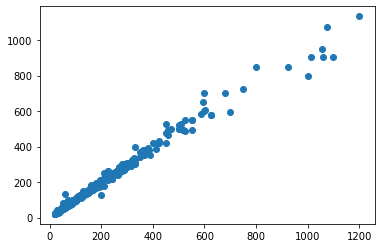

In [31]:
import pickle
import matplotlib.pyplot as plt
plt.scatter(Y_test,y_pred)

In [32]:
pickle.dump(regressor, open('mumbai_house_prices_prediction.pickle','wb'))

In [33]:
def predict_house_price(Location,Area,Lift,Car,Security):
  loc_index = np.where(X.columns==Location)[0][0]

  x = np.zeros(len(X.columns))
  x[0] = Area
  x[1] = Lift
  x[2] = Car
  x[3] = Security

  if loc_index >=0:
    x[loc_index] = 1

  regressor1 = pickle.load(open('mumbai_house_prices_prediction.pickle','rb'))

  return regressor1.predict([x])[0]

In [34]:
print('₹',predict_house_price('Airoli',200,0,1,1),'lakhs') 

₹ 20.57 lakhs


In [35]:
print('₹',predict_house_price('Worli',200,3,1,1),'lakhs') 

₹ 20.05 lakhs


In [36]:
print('₹',predict_house_price('Dombivali',1250,0,1,0),'lakhs') 

₹ 33.5 lakhs


In [37]:
print('₹',predict_house_price('Dahisar',780,1,0,1),'lakhs') 

₹ 21.5 lakhs


In [38]:
import json
columns={'data_column' :[col.lower() for col in X.columns]
         }
with open("columns.json","w") as f:
  f.write(json.dumps(columns))